In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import io

In [ ]:
from google.colab import files

In [ ]:
auto_mpg = files.upload()

Saving samsung.csv to samsung.csv


In [ ]:
raw_df = pd.read_csv(io.BytesIO(auto_mpg['samsung.csv']))

In [ ]:
df = pd.read_csv(io.BytesIO(auto_mpg['samsung.csv']))

In [ ]:
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2022/11/29,"60,300",200,0.33,"59,900","60,400","59,800","4,323,018","259,614,656,300","359,977,887,765,000","5,969,782,550"
1,2022/11/28,"60,100",-900,-1.48,"60,500","60,500","59,800","8,589,032","515,486,605,100","358,783,931,255,000","5,969,782,550"
2,2022/11/25,"61,000",-400,-0.65,"61,400","61,700","60,800","6,677,933","407,953,216,200","364,156,735,550,000","5,969,782,550"
3,2022/11/24,"61,400",400,0.66,"61,200","61,700","60,900","8,125,010","497,273,294,550","366,544,648,570,000","5,969,782,550"
4,2022/11/23,"61,000",400,0.66,"61,200","61,300","60,700","8,765,050","534,580,211,500","364,156,735,550,000","5,969,782,550"
...,...,...,...,...,...,...,...,...,...,...,...
2682,2012/01/06,"20,800",-300,-1.42,"21,120","21,320","20,600","376,753","391,885,116,160","153,191,310,480,000","147,299,337"
2683,2012/01/05,"21,100",-500,-2.31,"21,460","21,580","21,100","346,691","368,336,278,288","155,400,800,535,000","147,299,337"
2684,2012/01/04,"21,600",-500,-2.26,"22,100","22,200","21,500","342,389","372,043,473,000","159,083,283,960,000","147,299,337"
2685,2012/01/03,"22,100",500,2.31,"21,860","22,100","21,840","339,046","373,085,591,000","162,765,767,385,000","147,299,337"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      2687 non-null   object 
 1   종가      2687 non-null   object 
 2   대비      2687 non-null   object 
 3   등락률     2687 non-null   float64
 4   시가      2687 non-null   object 
 5   고가      2687 non-null   object 
 6   저가      2687 non-null   object 
 7   거래량     2687 non-null   object 
 8   거래대금    2687 non-null   object 
 9   시가총액    2687 non-null   object 
 10  상장주식수   2687 non-null   object 
dtypes: float64(1), object(10)
memory usage: 231.0+ KB


In [ ]:
df.isnull().sum()

일자       0
종가       0
대비       0
등락률      0
시가       0
고가       0
저가       0
거래량      0
거래대금     0
시가총액     0
상장주식수    0
dtype: int64

In [ ]:
df["종가"] = df["종가"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["일자"] = df["일자"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["시가"] = df["시가"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["고가"] = df["고가"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["저가"] = df["저가"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["거래량"] = df["거래량"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["거래대금"] = df["거래대금"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["시가총액"] = df["시가총액"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["상장주식수"] = df["상장주식수"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [ ]:
df.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,20221129,60300,200,0.33,59900,60400,59800,4323018,259614656300,359977887765000,5969782550
1,20221128,60100,-900,-1.48,60500,60500,59800,8589032,515486605100,358783931255000,5969782550
2,20221125,61000,-400,-0.65,61400,61700,60800,6677933,407953216200,364156735550000,5969782550
3,20221124,61400,400,0.66,61200,61700,60900,8125010,497273294550,366544648570000,5969782550
4,20221123,61000,400,0.66,61200,61300,60700,8765050,534580211500,364156735550000,5969782550


In [ ]:
df['종가'] = df['종가'].astype('float64')
df['시가'] = df['시가'].astype('float64')
df['고가'] = df['고가'].astype('float64')
df['저가'] = df['저가'].astype('float64')
df['거래량'] = df['거래량'].astype('float64')
df['거래대금'] = df['거래대금'].astype('float64')
df['시가총액'] = df['시가총액'].astype('float64')
df['상장주식수'] = df['상장주식수'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      2687 non-null   object 
 1   종가      2687 non-null   float64
 2   대비      2687 non-null   object 
 3   등락률     2687 non-null   float64
 4   시가      2687 non-null   float64
 5   고가      2687 non-null   float64
 6   저가      2687 non-null   float64
 7   거래량     2687 non-null   float64
 8   거래대금    2687 non-null   float64
 9   시가총액    2687 non-null   float64
 10  상장주식수   2687 non-null   float64
dtypes: float64(9), object(2)
memory usage: 231.0+ KB


In [ ]:
df = df.drop(labels=['대비','거래대금','시가총액','상장주식수'],axis=1,inplace=False)

In [ ]:
df.head()

,일자,종가,등락률,시가,고가,저가,거래량
0,20221129,60300.0,0.33,59900.0,60400.0,59800.0,4323018.0
1,20221128,60100.0,-1.48,60500.0,60500.0,59800.0,8589032.0
2,20221125,61000.0,-0.65,61400.0,61700.0,60800.0,6677933.0
3,20221124,61400.0,0.66,61200.0,61700.0,60900.0,8125010.0
4,20221123,61000.0,0.66,61200.0,61300.0,60700.0,8765050.0


In [ ]:
df.describe()

,종가,등락률,시가,고가,저가,거래량
count,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2.687000e+03
mean,43009.002605,0.052534,42963.148493,43368.578340,42546.107183,6.844981e+06
std,17887.285333,1.645477,17965.524134,18112.788546,17809.748099,9.469848e+06
min,20320.000000,-8.040000,0.000000,0.000000,0.000000,0.000000e+00
25%,26740.000000,-0.940000,26720.000000,26940.000000,26460.000000,2.162745e+05
50%,42020.000000,0.000000,41850.000000,42250.000000,41580.000000,3.609310e+05
75%,54040.000000,0.960000,54050.000000,54730.000000,53600.000000,1.268810e+07
max,91000.000000,10.470000,90300.000000,96800.000000,89500.000000,9.030618e+07


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

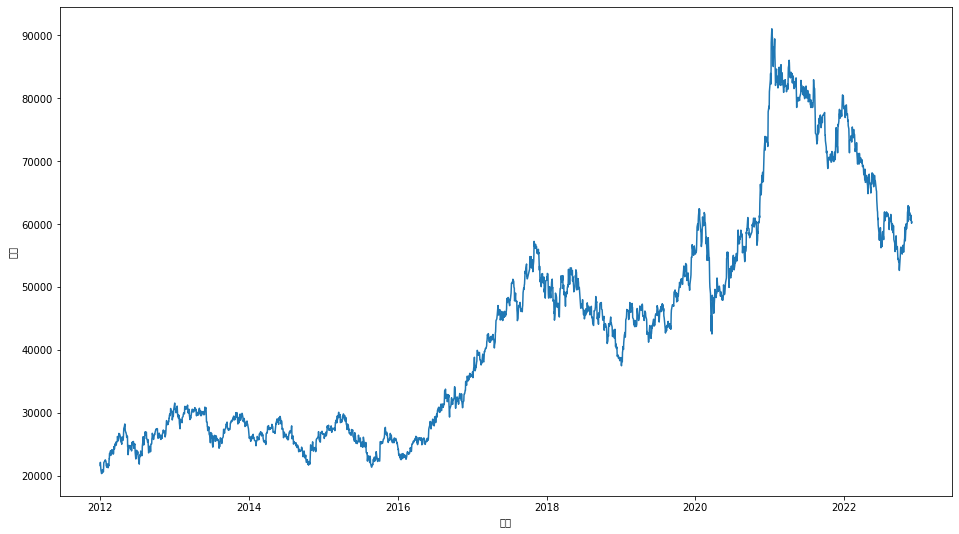

In [ ]:
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['종가'], x=df['일자'])

In [ ]:
samsung_corr = df.corr(method = 'pearson')

In [ ]:
samsung_corr

,종가,등락률,시가,고가,저가,거래량
종가,1.000000,0.010770,0.994549,0.994866,0.994873,0.719947
등락률,0.010770,1.000000,-0.013085,-0.001154,-0.003053,0.000490
시가,0.994549,-0.013085,1.000000,0.999685,0.999775,0.719581
고가,0.994866,-0.001154,0.999685,1.000000,0.999679,0.724945
저가,0.994873,-0.003053,0.999775,0.999679,1.000000,0.716218
거래량,0.719947,0.000490,0.719581,0.724945,0.716218,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0,

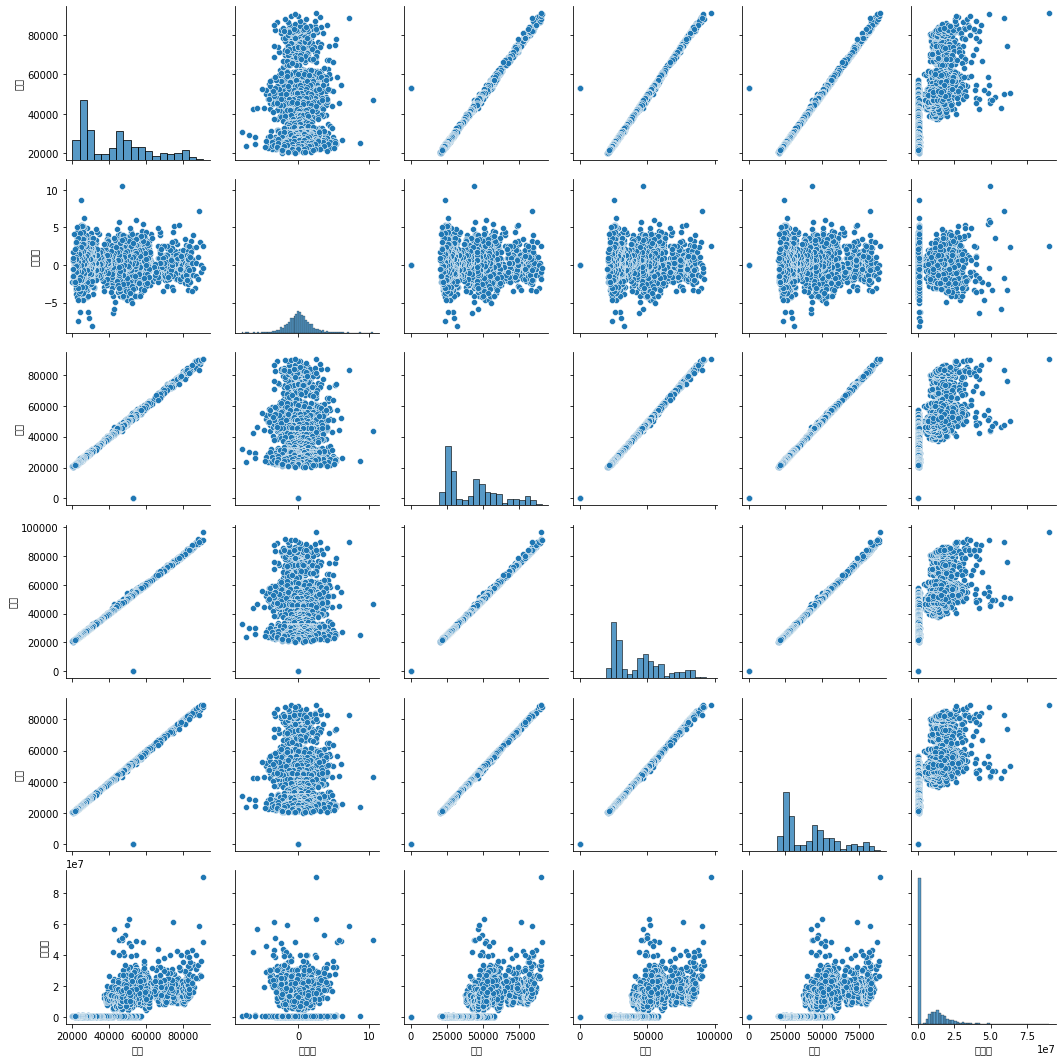

In [ ]:
sns.pairplot(df)

In [ ]:
Y = df['종가']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      2687 non-null   datetime64[ns]
 1   종가      2687 non-null   float64       
 2   등락률     2687 non-null   float64       
 3   시가      2687 non-null   float64       
 4   고가      2687 non-null   float64       
 5   저가      2687 non-null   float64       
 6   거래량     2687 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 147.1 KB


In [ ]:
Y = df['종가']

In [ ]:
X = df.drop(labels=['일자','종가','등락률'],axis=1,inplace=False)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

MSE : 3526481.295, RMSE : 1877.893
Y 절편 값:  621.2142766704419
회귀 계수 값:  [-0.6  0.6  1.   0. ]


In [ ]:
from seaborn.distributions import distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current f

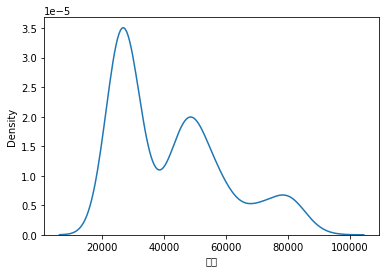

In [ ]:
ax1 = sns,distplot(Y_test, hist =False, label = 'y_test')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


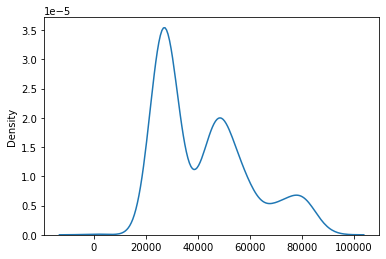

In [ ]:
ax2 = sns,distplot(Y_predict, hist =False, label = 'y_predict')

In [ ]:
plt.show()

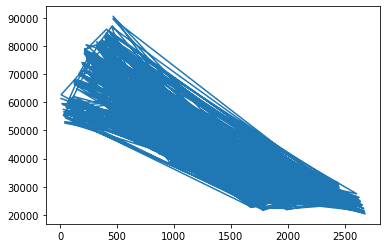

In [ ]:
plt.plot(Y_test, label='actual')

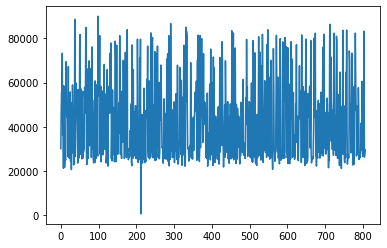

In [ ]:
plt.plot(Y_predict, label='prediction')

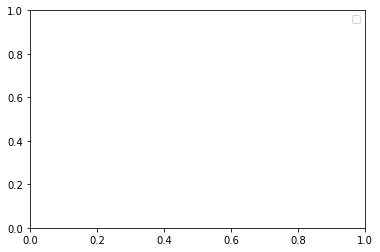

In [ ]:
plt.legend()